In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils import class_weight
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import random
import os

In [ ]:
# upload dataset
uploaded = files.upload()
CSV_NAME = "heart_attack_youngsters_india.csv"
df = pd.read_csv(CSV_NAME)

# display first few rows
df.head()

Saving heart_attack_youngsters_india.csv to heart_attack_youngsters_india.csv


,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,High,137.5/110.7,76,Normal,Non-anginal,118,No,97.1,341,No
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,Low,138.3/76.6,86,Normal,Typical,164,No,92.7,373,Yes
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,Low,130.7/108.8,73,Normal,Atypical,216,No,94.9,235,No


In [ ]:
# Explore basic info about the dataset

print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:\n")
print(df.dtypes)


Shape of dataset: (10000, 26)

Column names:
 ['Age', 'Gender', 'Region', 'Urban/Rural', 'SES', 'Smoking Status', 'Alcohol Consumption', 'Diet Type', 'Physical Activity Level', 'Screen Time (hrs/day)', 'Sleep Duration (hrs/day)', 'Family History of Heart Disease', 'Diabetes', 'Hypertension', 'Cholesterol Levels (mg/dL)', 'BMI (kg/m²)', 'Stress Level', 'Blood Pressure (systolic/diastolic mmHg)', 'Resting Heart Rate (bpm)', 'ECG Results', 'Chest Pain Type', 'Maximum Heart Rate Achieved', 'Exercise Induced Angina', 'Blood Oxygen Levels (SpO2%)', 'Triglyceride Levels (mg/dL)', 'Heart Attack Likelihood']

Data types:

Age                                           int64
Gender                                       object
Region                                       object
Urban/Rural                                  object
SES                                          object
Smoking Status                               object
Alcohol Consumption                          object
Diet Type      

In [ ]:
# Display summary statistics for numeric columns
df.describe()

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,26.601500,7.510700,6.489600,199.649000,27.44190,89.493400,159.683900,94.940730,275.010100
std,5.164239,4.626578,2.289327,57.561902,7.22374,17.318237,35.034037,2.883329,128.825994
min,18.000000,0.000000,3.000000,100.000000,15.00000,60.000000,100.000000,90.000000,50.000000
25%,22.000000,4.000000,4.000000,150.000000,21.20000,74.000000,129.000000,92.400000,164.000000
50%,27.000000,8.000000,6.000000,199.000000,27.50000,90.000000,160.000000,94.900000,277.000000
75%,31.000000,12.000000,8.000000,249.000000,33.70000,104.000000,190.000000,97.400000,385.000000
max,35.000000,15.000000,10.000000,300.000000,40.00000,119.000000,220.000000,100.000000,500.000000


In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Age                                         0
Gender                                      0
Region                                      0
Urban/Rural                                 0
SES                                         0
Smoking Status                              0
Alcohol Consumption                         0
Diet Type                                   0
Physical Activity Level                     0
Screen Time (hrs/day)                       0
Sleep Duration (hrs/day)                    0
Family History of Heart Disease             0
Diabetes                                    0
Hypertension                                0
Cholesterol Levels (mg/dL)                  0
BMI (kg/m²)                                 0
Stress Level                                0
Blood Pressure (systolic/diastolic mmHg)    0
Resting Heart Rate (bpm)                    0
ECG Results                                 0
Chest Pain Type                             0
Max

Heart Attack Likelihood
No     7962
Yes    2038
Name: count, dtype: int64


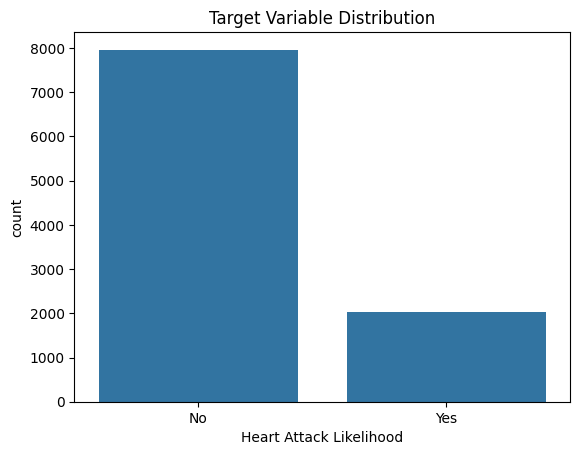

In [ ]:
# Check the distribution of the target column (Heart Attack Likelihood)
print(df['Heart Attack Likelihood'].value_counts())

sns.countplot(x='Heart Attack Likelihood', data=df)
plt.title('Target Variable Distribution')
plt.show()


In [ ]:
# Display column names
df.columns

Index(['Age', 'Gender', 'Region', 'Urban/Rural', 'SES', 'Smoking Status',
       'Alcohol Consumption', 'Diet Type', 'Physical Activity Level',
       'Screen Time (hrs/day)', 'Sleep Duration (hrs/day)',
       'Family History of Heart Disease', 'Diabetes', 'Hypertension',
       'Cholesterol Levels (mg/dL)', 'BMI (kg/m²)', 'Stress Level',
       'Blood Pressure (systolic/diastolic mmHg)', 'Resting Heart Rate (bpm)',
       'ECG Results', 'Chest Pain Type', 'Maximum Heart Rate Achieved',
       'Exercise Induced Angina', 'Blood Oxygen Levels (SpO2%)',
       'Triglyceride Levels (mg/dL)', 'Heart Attack Likelihood'],
      dtype='object')

In [ ]:
# Split the blood pressure column into two separate numeric columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure (systolic/diastolic mmHg)'].str.split('/', expand=True).astype(float)

# Drop the original combined column
df.drop(columns=['Blood Pressure (systolic/diastolic mmHg)'], inplace=True)

# Check new columns
df[['Systolic_BP', 'Diastolic_BP']].head()


,Systolic_BP,Diastolic_BP
0,177.0,63.1
1,137.5,110.7
2,138.3,76.6
3,177.1,90.0
4,130.7,108.8


In [ ]:
# Encode target variable (Heart Attack Likelihood)
df['Heart Attack Likelihood'] = df['Heart Attack Likelihood'].map({'Yes': 1, 'No': 0})

df['Heart Attack Likelihood'].value_counts()


,count
Heart Attack Likelihood,
0,7962
1,2038


In [ ]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:\n", categorical_cols)
print("\nNumerical Columns:\n", numerical_cols)


Categorical Columns:
 ['Gender', 'Region', 'Urban/Rural', 'SES', 'Smoking Status', 'Alcohol Consumption', 'Diet Type', 'Physical Activity Level', 'Family History of Heart Disease', 'Diabetes', 'Hypertension', 'Stress Level', 'ECG Results', 'Chest Pain Type', 'Exercise Induced Angina']

Numerical Columns:
 ['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs/day)', 'Cholesterol Levels (mg/dL)', 'BMI (kg/m²)', 'Resting Heart Rate (bpm)', 'Maximum Heart Rate Achieved', 'Blood Oxygen Levels (SpO2%)', 'Triglyceride Levels (mg/dL)', 'Heart Attack Likelihood', 'Systolic_BP', 'Diastolic_BP']


In [ ]:
# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", df_encoded.shape)
df_encoded.head()

Shape after encoding: (10000, 40)


,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood,...,Family History of Heart Disease_Yes,Diabetes_Yes,Hypertension_Yes,Stress Level_Low,Stress Level_Medium,ECG Results_Normal,Chest Pain Type_Atypical,Chest Pain Type_Non-anginal,Chest Pain Type_Typical,Exercise Induced Angina_Yes
0,30,3,8,148,34.4,82,183,94.1,58,0,...,False,False,True,False,False,True,False,True,False,False
1,24,15,9,124,25.0,76,118,97.1,341,0,...,False,False,False,False,False,True,False,True,False,False
2,24,15,3,256,33.9,86,164,92.7,373,1,...,True,True,False,True,False,True,False,False,True,False
3,27,6,7,137,19.0,106,188,98.4,102,1,...,False,False,False,False,True,True,False,True,False,False
4,21,4,9,262,28.0,73,216,94.9,235,0,...,True,False,False,True,False,True,True,False,False,False


**Feature** **Scaling**

In [ ]:
# Separate features (X) and target (y)
X = df_encoded.drop('Heart Attack Likelihood', axis=1)
y = df_encoded['Heart Attack Likelihood']

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (8000, 39)
Testing data shape: (2000, 39)


In [ ]:
# Apply SMOTE to training data only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({0: 6370, 1: 1630})
After SMOTE: Counter({0: 6370, 1: 6370})


In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data (after SMOTE) and transform both sets
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed successfully!")
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)

Feature scaling completed successfully!
Scaled training data shape: (12740, 39)
Scaled testing data shape: (2000, 39)


**Model Training**

Train Logistic Regression Model

In [ ]:
# Initialize model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_model.fit(X_train_scaled, y_train_res)

# Predict on test set
y_pred = log_model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", round(accuracy, 4))


Logistic Regression Accuracy: 0.7115



Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1592
           1       0.21      0.15      0.17       408

    accuracy                           0.71      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.68      0.71      0.69      2000


Confusion Matrix:
 [[1362  230]
 [ 347   61]]


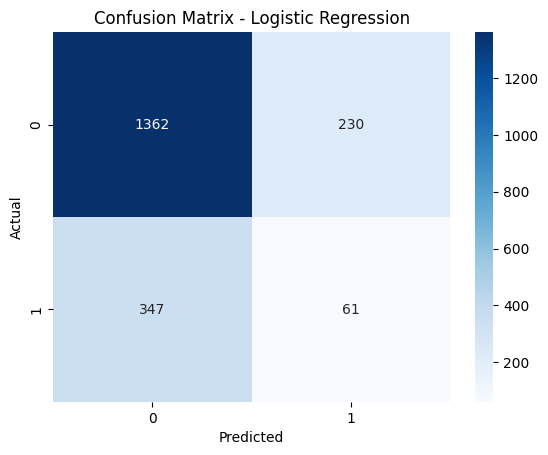


ROC-AUC Score: 0.5146


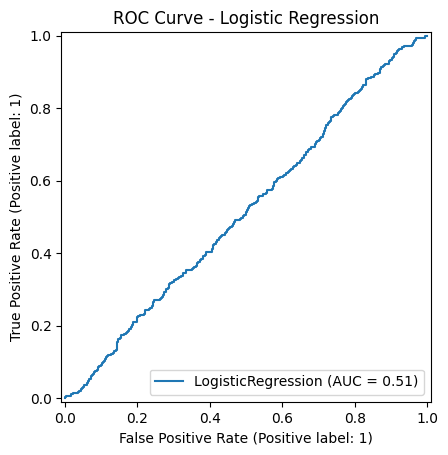

In [ ]:
# Detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Score
roc_score = roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1])
print("\nROC-AUC Score:", round(roc_score, 4))

# Plot ROC Curve
RocCurveDisplay.from_estimator(log_model, X_test_scaled, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

Build the ANN Model

In [ ]:
# Fix all random seeds
os.environ['PYTHONHASHSEED'] = str(42)
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Build the ANN model
model_ann = Sequential([
    Dense(64, input_dim=X_train_res.shape[1], activation='relu'),  # first hidden layer
    Dropout(0.3),  # to reduce overfitting
    Dense(32, activation='relu'),  # second hidden layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # output layer for binary classification
])

# Compile the model
model_ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_ann.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the ANN model
history = model_ann.fit(
    X_train_res, y_train_res,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5423 - loss: 3.0620 - val_accuracy: 0.0012 - val_loss: 0.8424
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6022 - loss: 0.7203 - val_accuracy: 0.0000e+00 - val_loss: 0.8737
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6141 - loss: 0.6778 - val_accuracy: 0.0000e+00 - val_loss: 0.8889
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6222 - loss: 0.6718 - val_accuracy: 0.0000e+00 - val_loss: 0.8665
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6218 - loss: 0.6679 - val_accuracy: 0.0000e+00 - val_loss: 0.9154
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6238 - loss: 0.6671 - val_accuracy: 0.0000e+00 - val_loss: 0.9008
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6264 - loss: 0.6656 - val_accuracy: 0.0000e+00 - val_loss: 0.9119
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6234 - loss: 0

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1592
           1       0.09      0.01      0.01       408

    accuracy                           0.78      2000
   macro avg       0.44      0.49      0.45      2000
weighted avg       0.65      0.78      0.70      2000

Confusion Matrix:


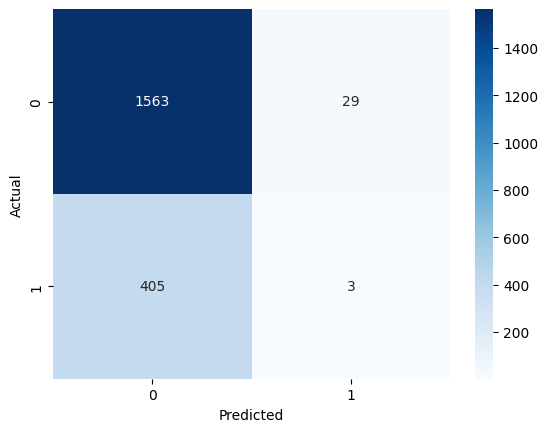

ROC-AUC Score: 0.5195
Test Accuracy: 0.7830


In [ ]:
# Evaluate on test set
y_pred_prob = model_ann.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Evaluate accuracy on the test dataset
loss, accuracy = model_ann.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")



Gradient boosting

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1592
           1       0.24      0.14      0.17       408

    accuracy                           0.74      2000
   macro avg       0.52      0.51      0.51      2000
weighted avg       0.69      0.74      0.71      2000

ROC-AUC Score: 0.5191


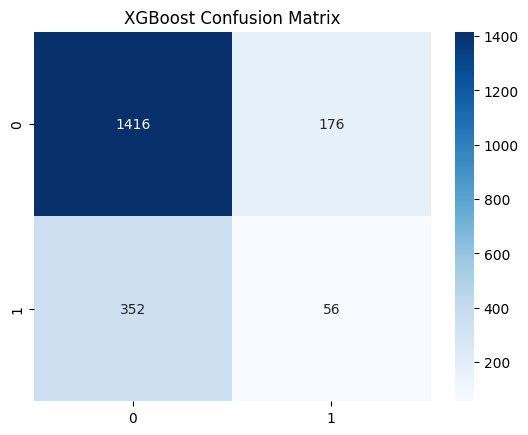

In [ ]:
# XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=3   # give more weight to minority class
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb_prob)
print(f"ROC-AUC Score: {roc_auc_xgb:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()


  KNN

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.55      0.65      1592
           1       0.20      0.42      0.27       408

    accuracy                           0.53      2000
   macro avg       0.49      0.49      0.46      2000
weighted avg       0.67      0.53      0.57      2000

Confusion Matrix:


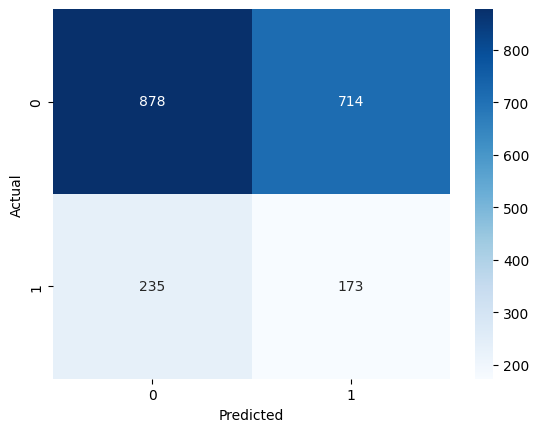

ROC-AUC Score: 0.4888


In [ ]:
# Initialize KNN model
knn_model = KNeighborsClassifier(
    n_neighbors=5,      # number of nearest neighbors
    metric='minkowski', # default distance metric (Euclidean)
    p=2                 # Euclidean distance
)

# Train the model
knn_model.fit(X_train_res, y_train_res)

# Predict on test data
y_pred_knn = knn_model.predict(X_test)
y_pred_knn_prob = knn_model.predict_proba(X_test)[:, 1]

# Evaluate
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

roc_auc_knn = roc_auc_score(y_test, y_pred_knn_prob)
print(f"ROC-AUC Score: {roc_auc_knn:.4f}")


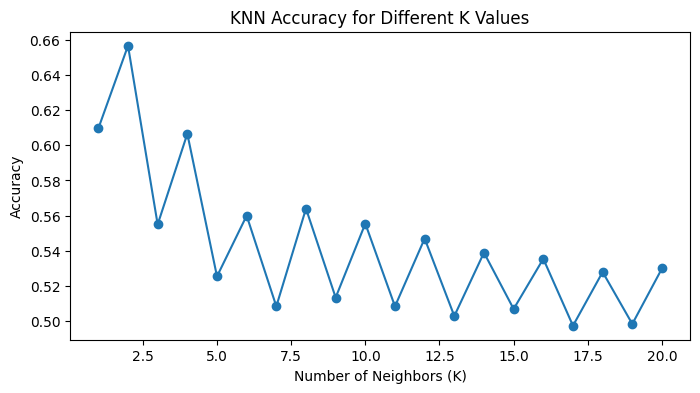

In [ ]:

# Try different values of K to find the best one
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res, y_train_res)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.show()


Decision Trees

In [ ]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(
    criterion='gini',       # or 'entropy'
    max_depth=6,            # limit depth to avoid overfitting
    random_state=42
)
dt_model.fit(X_train_res, y_train_res)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)
y_pred_dt_prob = dt_model.predict_proba(X_test)[:, 1]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1592
           1       0.21      0.14      0.17       408

    accuracy                           0.72      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.68      0.72      0.69      2000



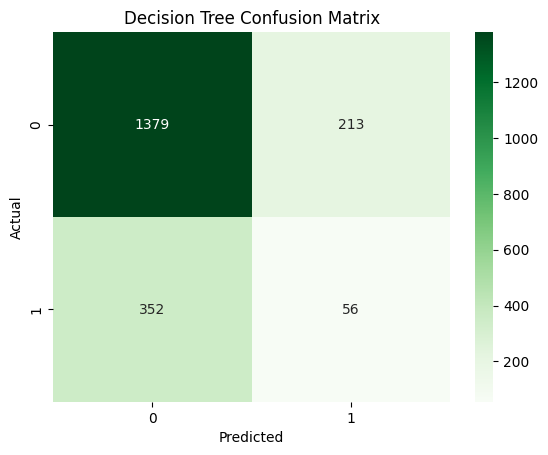

ROC-AUC Score: 0.5324


In [ ]:
# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

roc_auc_dt = roc_auc_score(y_test, y_pred_dt_prob)
print(f"ROC-AUC Score: {roc_auc_dt:.4f}")

Random forest

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,     # number of trees
    max_depth=None,       # let trees grow fully
    random_state=42,
    class_weight='balanced'   # handle class imbalance
)

# Train the model
rf_model.fit(X_train_res, y_train_res)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1592
           1       0.25      0.03      0.05       408

    accuracy                           0.79      2000
   macro avg       0.52      0.50      0.46      2000
weighted avg       0.69      0.79      0.71      2000



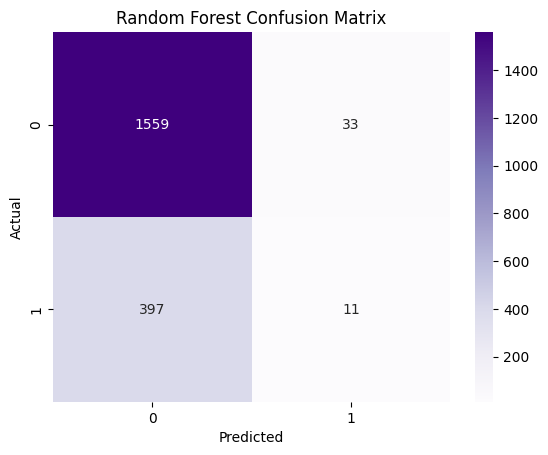

ROC-AUC Score: 0.5007


In [ ]:
# Evaluate performance
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_prob)
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")

Gradient Boosting

In [ ]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=1000,      # number of boosting stages
    learning_rate=0.2,     # smaller rate = slower but more accurate learning
    max_depth=5,           # depth of individual trees
    random_state=42
)
gb_model.fit(X_train_res, y_train_res)

# Predict on test data
y_pred_gb = gb_model.predict(X_test)
y_pred_gb_prob = gb_model.predict_proba(X_test)[:, 1]


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1592
           1       0.22      0.08      0.11       408

    accuracy                           0.76      2000
   macro avg       0.51      0.50      0.49      2000
weighted avg       0.68      0.76      0.71      2000



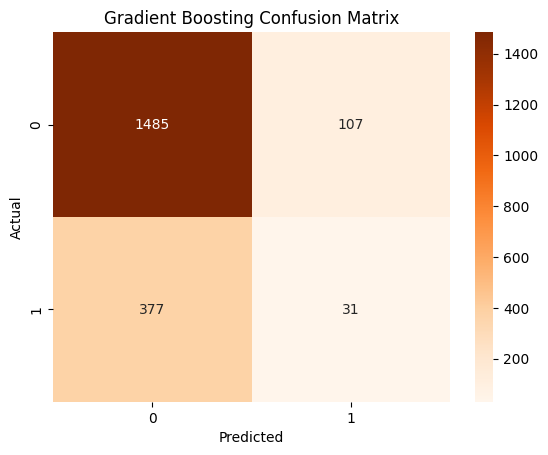

ROC-AUC Score: 0.5154


In [ ]:
# Evaluate performance
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC
roc_auc_gb = roc_auc_score(y_test, y_pred_gb_prob)
print(f"ROC-AUC Score: {roc_auc_gb:.4f}")

Hypre parameter tuning

In [ ]:
# Define base model
gb = GradientBoostingClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Grid Search setup
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='recall',  # focus on improving recall for high-risk cases
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Fit on the SMOTE-balanced training data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='recall', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score (train):", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Recall Score (train): 0.7362241749481585


In [ ]:
# Train the best model on the full balanced training set
best_gb = grid_search.best_estimator_

# Predict on test data
y_pred_gb = best_gb.predict(X_test_scaled)
y_pred_proba_gb = best_gb.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_gb))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.37      0.50      1592
           1       0.20      0.62      0.30       408

    accuracy                           0.42      2000
   macro avg       0.49      0.49      0.40      2000
weighted avg       0.67      0.42      0.46      2000

ROC-AUC Score: 0.48463826485368017


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


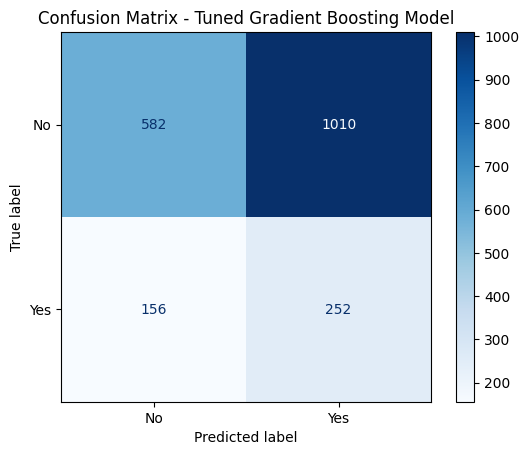

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix - Tuned Gradient Boosting Model")
plt.show()